# PROJECT 2
## House Prices-Advance Regression Techniques
## Expected Results
- Predict the houses sale price
- Find out Important Feature
- RFs
- Gradient boosing

# EDA - Exploratary Data analysis And feature Engineering

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp

In [3]:
df= pd.read_csv("Cleaned_Train_Data_File.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Lst_remod,old,Last_sold
0,1,60,RL,65.0,8450,Pave,Not_A,Reg,Lvl,AllPub,...,MnPrv,Shed,0,2,WD,Normal,208500,17,17,12
1,2,20,RL,80.0,9600,Pave,Not_A,Reg,Lvl,AllPub,...,MnPrv,Shed,0,5,WD,Normal,181500,44,44,13
2,3,60,RL,68.0,11250,Pave,Not_A,IR1,Lvl,AllPub,...,MnPrv,Shed,0,9,WD,Normal,223500,18,19,12
3,4,70,RL,60.0,9550,Pave,Not_A,IR1,Lvl,AllPub,...,MnPrv,Shed,0,2,WD,Abnorml,140000,50,105,14
4,5,60,RL,84.0,14260,Pave,Not_A,IR1,Lvl,AllPub,...,MnPrv,Shed,0,12,WD,Normal,250000,20,20,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Let's see Correalation Between Our Featureas

In [5]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Lst_remod,old,Last_sold
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.050199,-0.005024,-0.005968,-0.007940,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917,0.021998,0.012713,-0.000712
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.022895,-0.069836,-0.065649,-0.140759,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.040581,-0.027850,0.021407
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.179283,0.215828,0.043340,0.122156,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.334901,-0.082746,-0.117598,-0.006768
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.103960,0.214103,0.111170,-0.002618,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.013788,-0.014228,0.014261
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.410238,0.239666,-0.059119,0.308159,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.550684,-0.572323,0.027347
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.127788,-0.046231,0.040229,-0.136841,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,-0.073741,0.375983,-0.043950
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,1.000000,0.263582,-0.072302,0.114184,...,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,0.475241,-0.179186,-0.314745,0.008184
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.263582,1.000000,-0.050117,-0.495251,...,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.128451,-0.249503,-0.014359
BsmtFinSF2,-0.005968,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.072302,-0.050117,1.000000,-0.209294,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.067759,0.049107,-0.031706
BsmtUnfSF,-0.007940,-0.140759,0.122156,-0.002618,0.308159,-0.136841,0.114184,-0.495251,-0.209294,1.000000,...,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.181133,-0.149040,0.041258


### Heatmap chart

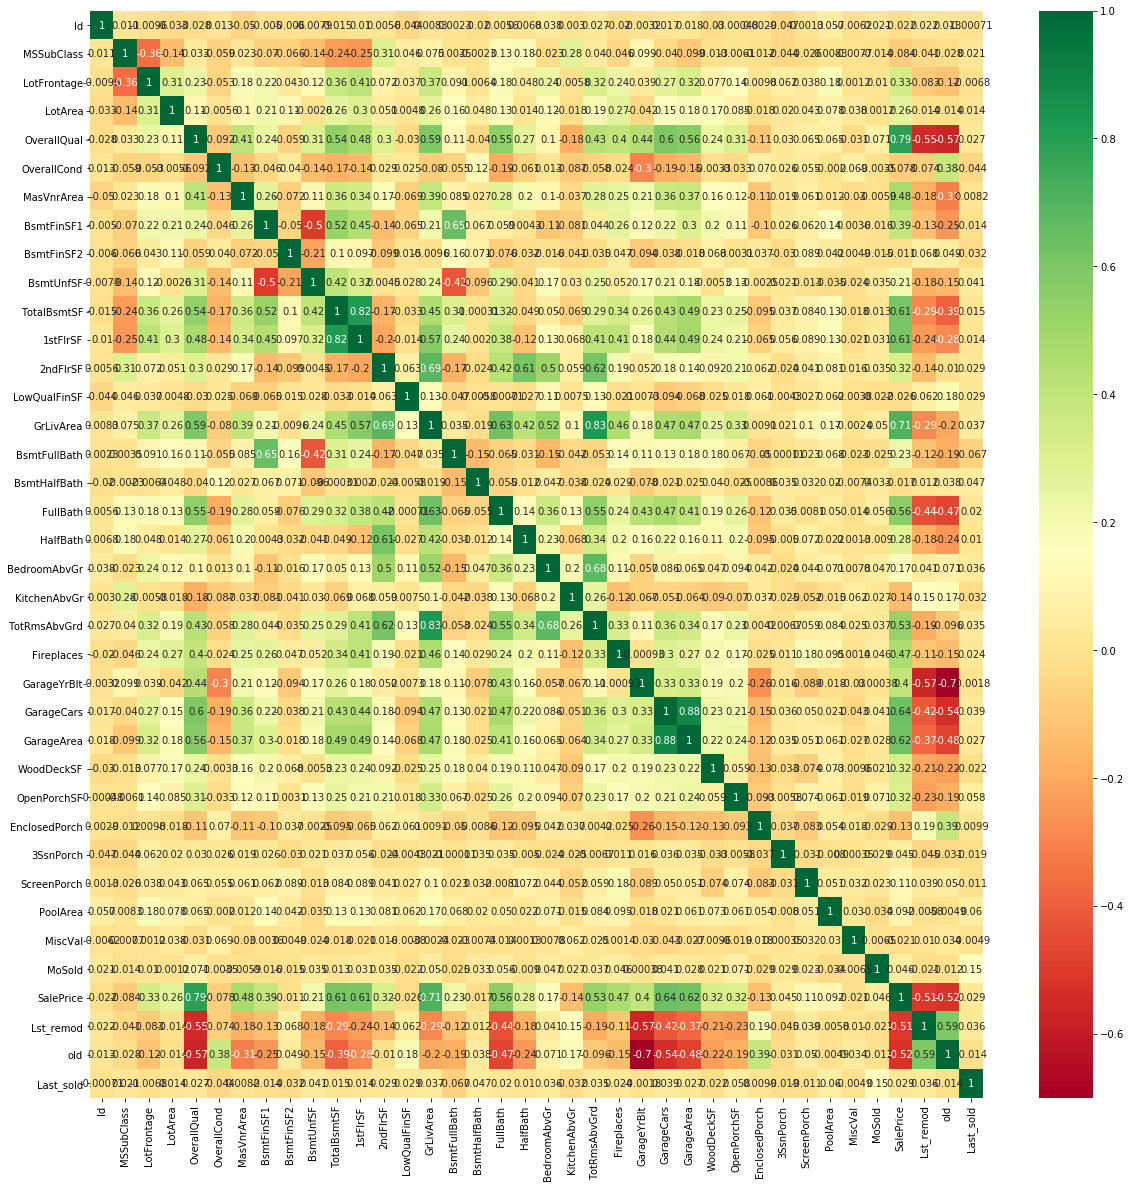

In [6]:
import matplotlib.pyplot as mpl
%matplotlib inline

crr= df.corr()
top_cf= crr.index
mpl.figure(figsize = (20,20))

g= sns.heatmap(df[top_cf].corr(),annot= True ,cmap= 'RdYlGn')

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

### Highly Positive correlations features with Sale_Price
- GarageArea
- GarageCars
- TotRmsAbvGrd
- FullBath
- GrLivArea
- 1stFlrSF
- TotalBsmtSF
- MasVnrArea
- Lst_remod
- old
- (OverallQual) -- higest

### Low Positive correlations features with Sale_Price
- Fireplaces
- BsmtFinSF1
- LotFrontage

### Highly Negative correlations features with Sale_Price
- EnclosedPorch
- KitchenAbvGr
- BsmtHalfBath
- LowQualFinSF
- BsmtFinSF2
- OverallCond
- (MSSubClass)- higest

### Low Negative correlations features with Sale_Price
- YrSold
- MiscVal
- 3SsnPorch

## Get the Correlated Features

In [8]:
fdf = df[['SalePrice','GarageCars','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF','MasVnrArea','Lst_remod','old','OverallQual','EnclosedPorch','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','BsmtFinSF2','OverallCond','MSSubClass','Last_sold','MiscVal','3SsnPorch']]

In [9]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   GarageCars     1460 non-null   int64  
 2   TotRmsAbvGrd   1460 non-null   int64  
 3   FullBath       1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   1stFlrSF       1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   Lst_remod      1460 non-null   int64  
 9   old            1460 non-null   int64  
 10  OverallQual    1460 non-null   int64  
 11  EnclosedPorch  1460 non-null   int64  
 12  KitchenAbvGr   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  BsmtFinSF2     1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  MSSubClass     1460 non-null   int64  
 18  Last_sol

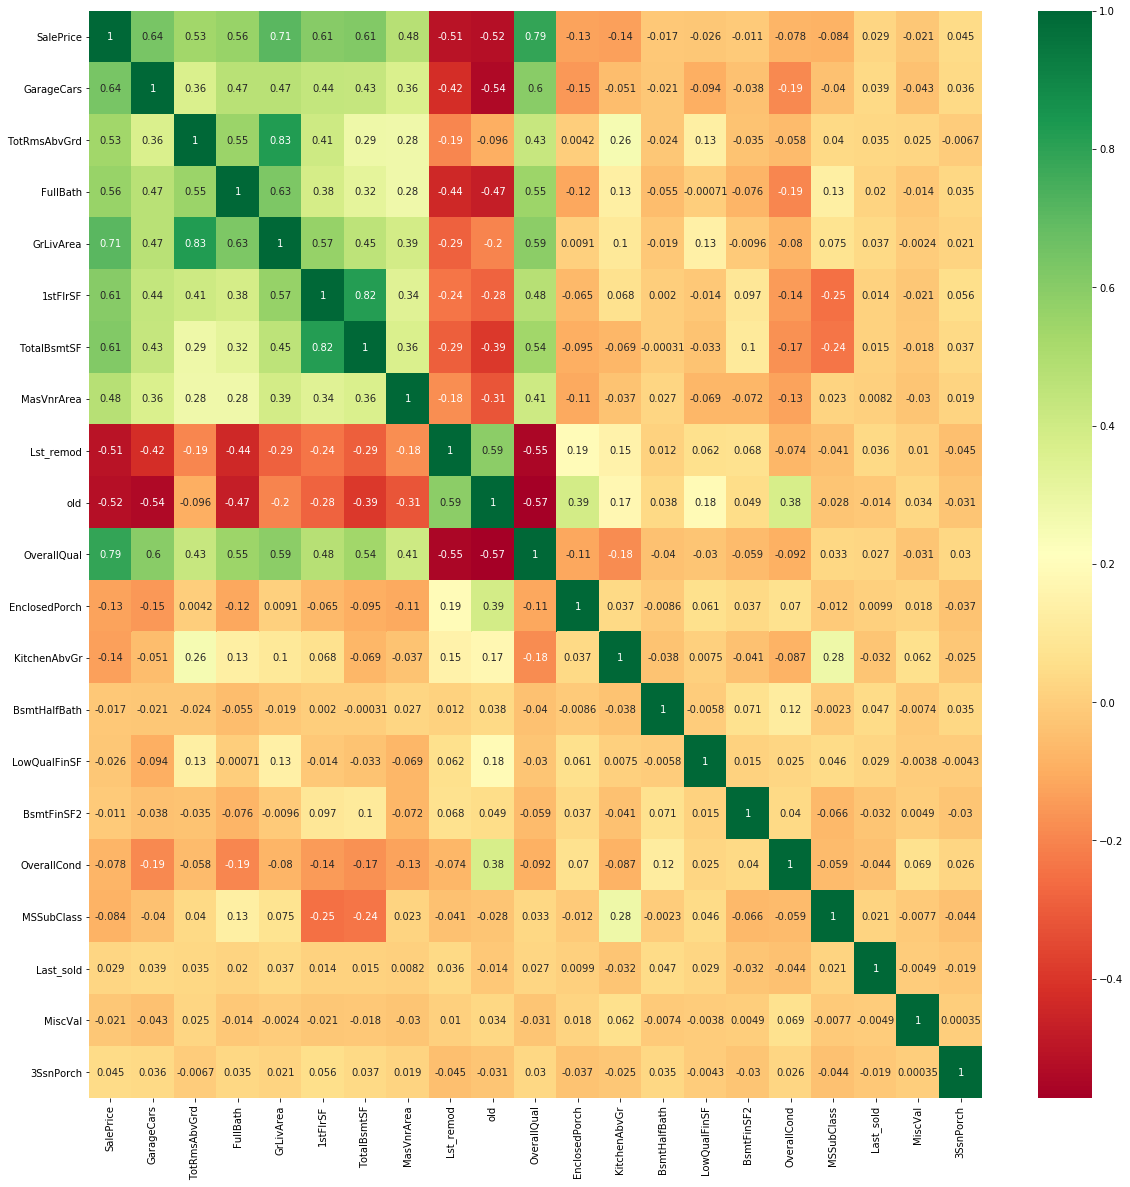

In [10]:

crr= fdf.corr()
top_cf= crr.index
mpl.figure(figsize = (20,20))

g= sns.heatmap(fdf[top_cf].corr(),annot= True ,cmap= 'RdYlGn')

## Data Descreptions

#### SalePrice - Independent 
#### GarageCars: Size of garage in car capacity
#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### FullBath: Full bathrooms above grade
#### GrLivArea: Above grade (ground) living area square feet
#### 1stFlrSF: First Floor square feet
#### TotalBsmtSF: Total square feet of basement area
#### MasVnrArea: Masonry veneer area in square feet
#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
#### YearBuilt: Original construction date

#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
#### EnclosedPorch: Enclosed porch area in square feet
#### KitchenAbvGr: Kitchens above grade
#### BsmtHalfBath: Basement half bathrooms
#### LowQualFinSF: Low quality finished square feet (all floors)

#### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
#### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
#### YrSold: Year Sold (YYYY)
#### MiscVal: Value of miscellaneous feature
#### 3SsnPorch: Three season porch area in square feet

# Save Dataset

In [17]:
fdf.to_csv("Cleaned1_Train_Data_File.csv",index= False)

## feature Importance

In [23]:
x = fdf.iloc[:,1:]
y = fdf.iloc[:,0]

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
print(model.feature_importances_)

[0.14305797 0.02276473 0.06377304 0.14187568 0.05958631 0.06255725
 0.0152903  0.04377189 0.05651706 0.33244809 0.00375284 0.00659585
 0.00692894 0.00111122 0.00461806 0.01213901 0.01073157 0.00895862
 0.00109496 0.00242661]


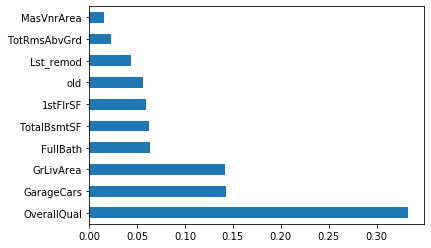

In [26]:
fi = pd.Series(model.feature_importances_, index = x.columns)
fi.nlargest(10).plot(kind='barh')
mpl.show()

## Most important features are
- OverallQual
- GarageCars
- GrLivarea
- Old
